In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [6]:
ecommerce_data=pd.read_csv( '/content/Ecommerce_Customers.csv')



In [7]:
ecommerce_data.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
ecommerce_data.describe()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [37]:
ecommerce_data.isnull()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False


<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

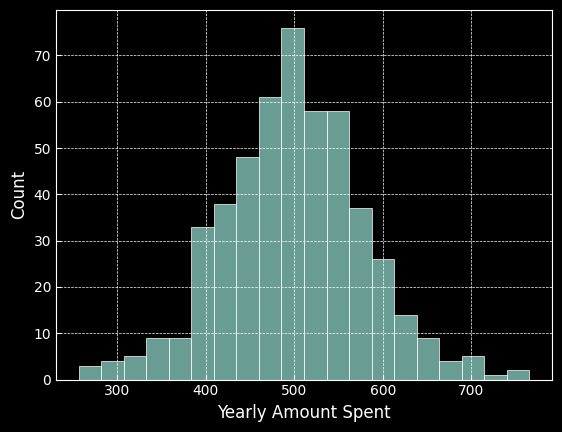

In [36]:
sns.histplot(ecommerce_data['Yearly Amount Spent'])

In [32]:
data_drop=ecommerce_data.drop(['Email','Address','Avatar'],axis=1)

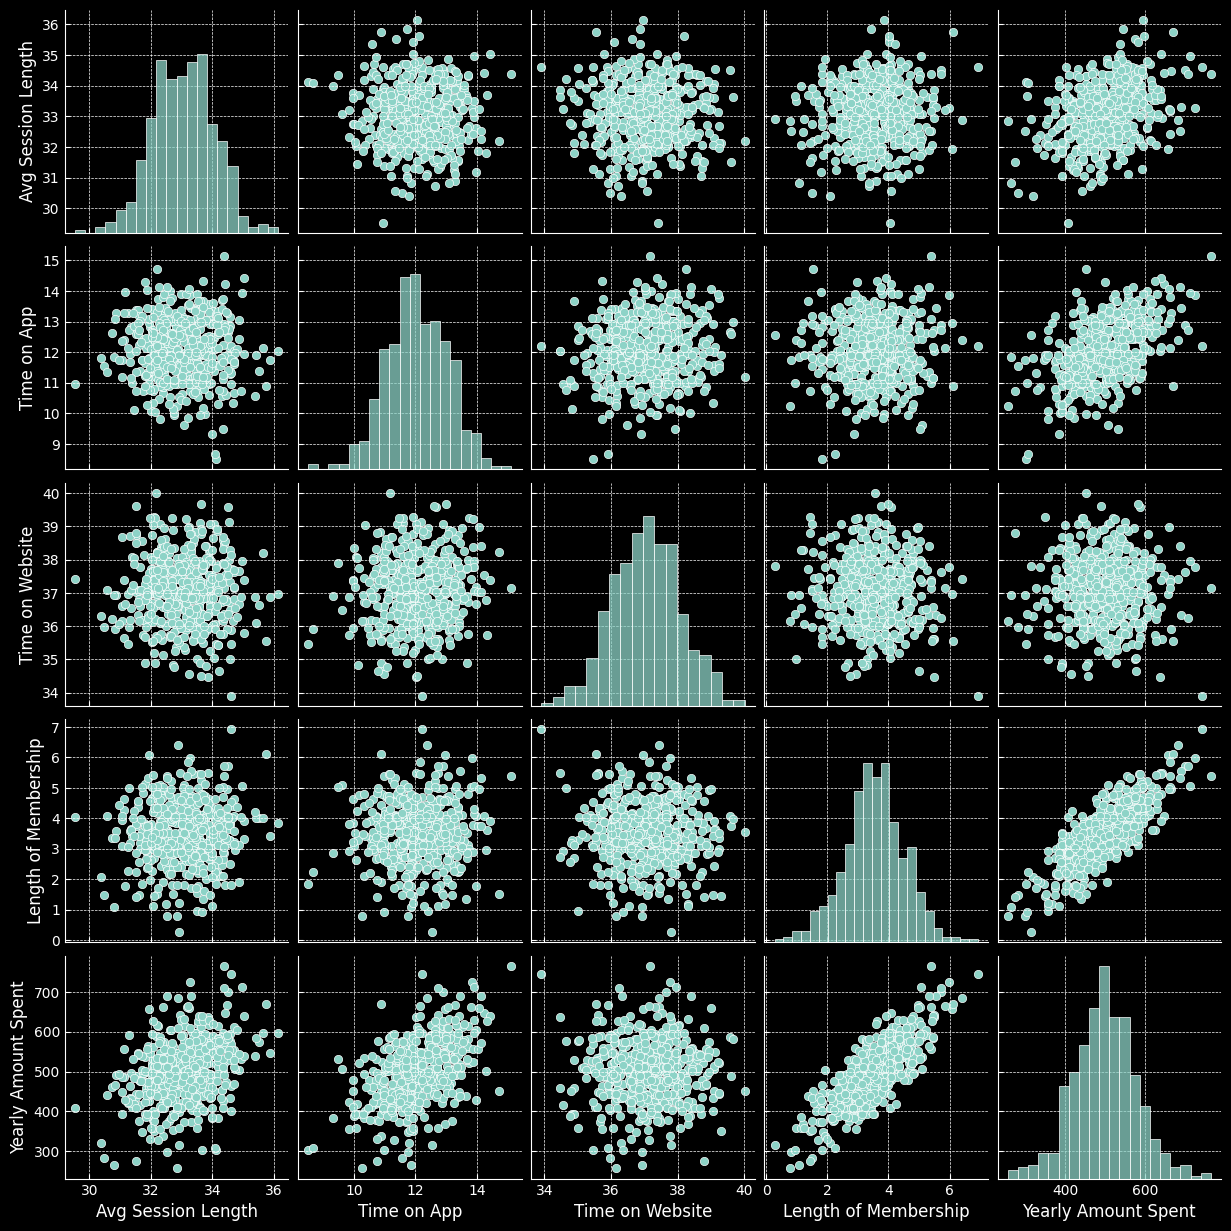

In [33]:
sns.pairplot(ecommerce_data)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Yearly Amount Spent')

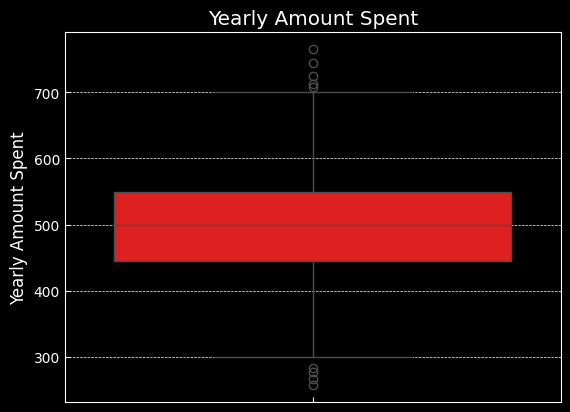

In [34]:
sns.boxplot(ecommerce_data['Yearly Amount Spent'],orient='v',color='r')

plt.title('Yearly Amount Spent')


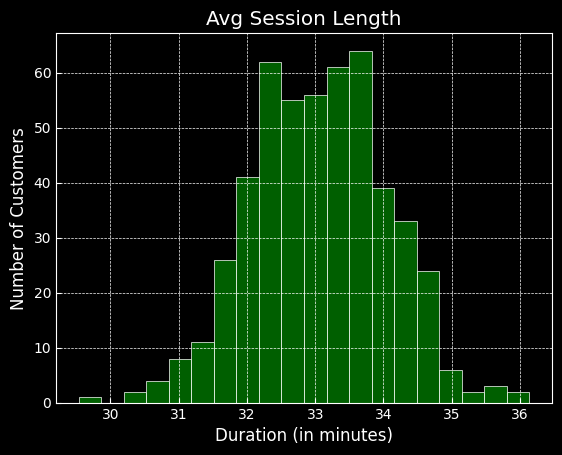

In [35]:
sns.histplot(ecommerce_data['Avg Session Length'],color='g')
plt.title('Avg Session Length')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Number of Customers')
plt.style.use('dark_background')

<ipython-input-46-70d3a1875dd2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ecommerce_data['Time on App'],color='b')


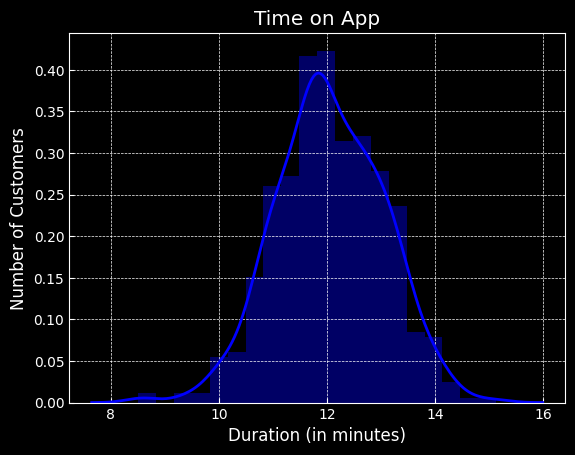

In [46]:
sns.distplot(ecommerce_data['Time on App'],color='b')
plt.title('Time on App')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Number of Customers')
plt.style.use('dark_background')
#

In [47]:
x=ecommerce_data[['Avg Session Length','Time on App','Time on Website','Length of Membership']]
y=ecommerce_data['Yearly Amount Spent']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [60]:
from sklearn.metrics import mean_squared_error

def display_results(model, X_train, X_test, y_train, y_test): # Pass X_train, X_test, y_train, y_test as arguments
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict = model.predict(X_train)
    ytest_predict = model.predict(X_test)

    train_error = np.sqrt(mean_squared_error(y_train, ytrain_predict))
    test_error = np.sqrt(mean_squared_error(y_test, ytest_predict))

    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)

    # Scatter plot for training and testing predictions
    plt.scatter(y_train, ytrain_predict, marker='o', label='Train Predictions')
    plt.scatter(y_test, ytest_predict, marker='^', label='Test Predictions')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted Values')
    plt.legend()
    plt.show()

    print("Coefficients:")

In [55]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)


0.9890046246741234

In [56]:
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

Training error (rmse): 10.336893843068005
Testing error (rmse): 8.933815066978653


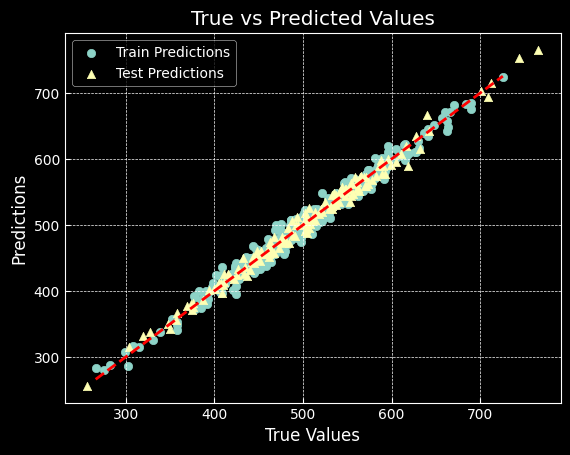

Coefficients:


In [66]:
display_results(reg, x_train, x_test, y_train, y_test)

In [57]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)
model.fit(x_train, y_train)

Lasso()

Training error (rmse): 10.490039227610128
Testing error (rmse): 9.239589650349856


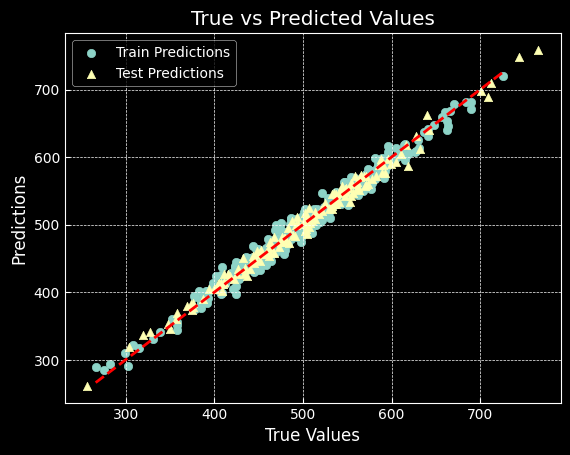

Coefficients:


In [62]:
display_results(model, x_train, x_test, y_train, y_test)

In [69]:
from sklearn.linear_model import Ridge
modell = Lasso(alpha=1.0)
modell.fit(x_train, y_train)

Lasso()

Training error (rmse): 10.490039227610128
Testing error (rmse): 9.239589650349856


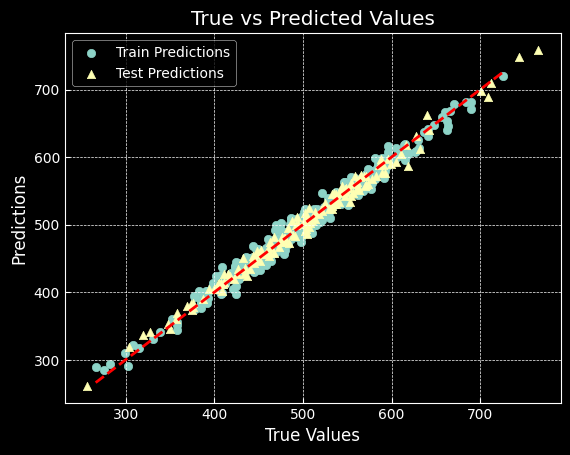

Coefficients:


In [70]:
display_results(modell, x_train, x_test, y_train, y_test)